<a href="https://colab.research.google.com/github/antonblockchain/Algoloop/blob/master/futoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests as re
import time
from datetime import datetime, timedelta
from io import StringIO
s = re.Session()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5) 
plt.style.use('ggplot')

In [ ]:
#login – email, указанный при регистрации на сайте moex.com
#password – пароль от учетной записи на сайте moex.com
login = '...@yandex.ru'
password = '...'

In [ ]:

s.get('https://passport.moex.com/authenticate', auth=(login, password))
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101Firefox/66.0"}
cookies = {'MicexPassportCert': s.cookies['MicexPassportCert']}

In [ ]:
ticker = 'ri'
last_n_days = 5

In [ ]:
base = datetime.today()
date_list = [base - timedelta(days=x) for x in range(last_n_days)]

In [ ]:
url = 'https://iss.moex.com/iss/analyticalproducts/futoi/securities/' + ticker + '.csv?iss.only=futoi&from=%s&till=%s'

A = pd.DataFrame()
for i in date_list:
  date = i.strftime('%Y-%m-%d')
  req = re.get(url % (date, date), headers=headers, cookies = cookies)
  data = StringIO(req.text)
  X = pd.read_csv(data, ';', skiprows = 2)
  A = A.append(X, ignore_index=True)
  time.sleep(0.1)


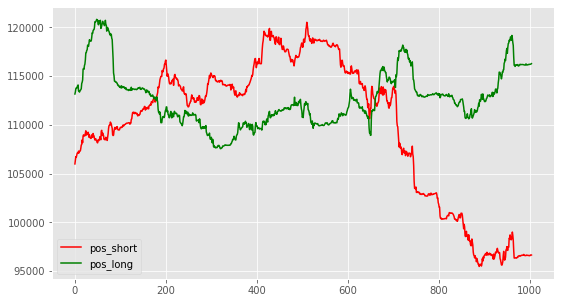

In [ ]:
#YUR
A[A['clgroup'] == 'YUR'][['pos_short', 'pos_long']].abs().reset_index(drop=True).plot(color=['r', 'g'])

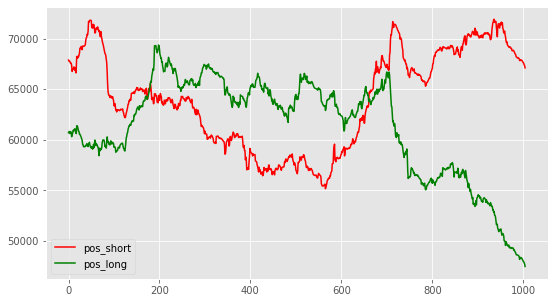

In [ ]:
#FIZ
A[A['clgroup'] == 'FIZ'][['pos_short', 'pos_long']].abs().reset_index(drop=True).plot(color=['r', 'g'])